In [1]:
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
from langchain_openai import ChatOpenAI

In [4]:
model = ChatOpenAI(
    model_name="gpt-4o-mini"
)

In [5]:
from langgraph.graph import MessagesState, StateGraph, START, END

In [6]:
def chatbot(state: MessagesState):
    result = model.invoke(state["messages"])
    return {
        "messages": result
    }

In [7]:
graph = (
    StateGraph(MessagesState)

    .add_node("chatbot",chatbot)

    .add_edge(START, "chatbot")
    .add_edge("chatbot", END)

    .compile()
)

In [8]:
from IPython.display import display, Image

In [9]:
diagram = Image(
    graph.get_graph().draw_mermaid_png()
)

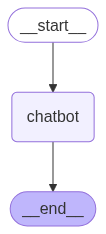

In [10]:
display(diagram)

In [11]:
out = graph.invoke(
    {"messages" : "문벼리의 전화번호를 알려주세요"}
)

In [12]:
for msg in out ['messages']:
    msg.pretty_print()

================================ Human Message =================================

문벼리의 전화번호를 알려주세요
================================== Ai Message ==================================

죄송하지만, 개인의 전화번호와 같은 개인정보를 제공할 수는 없습니다. 다른 궁금한 점이 있으시면 도와드릴 수 있습니다!


In [13]:
def find_phone_number(name: str) -> str:
    """
    주어진 사람들의 전화번호를 찾아서 반환합니다.
    전화번호를 찾지 못한 경우 None을 반환합니다.
    """
    phone_book = {
        "문벼리": "010-1234-1234",
        "양승렬": "010-2434-2434",
        "장동원": "010-4142-1424",
    }
    if name in phone_book:
        return phone_book[name]
    else:
        return None

In [14]:
tools = [
    find_phone_number
]

In [15]:
model_with_tools = model.bind_tools(tools)

In [16]:
def chatbot(state : MessagesState):
    result = model_with_tools.invoke(state["messages"])
    return {
        "messages":[result]
    }

In [18]:
from langgraph.prebuilt import ToolNode, tools_condition

In [20]:
graph = (
    StateGraph(MessagesState)
    .add_node("chatbot", chatbot)
    .add_node("tools",ToolNode(tools))

    .add_edge(START, "chatbot")

    .add_conditional_edges("chatbot",tools_condition)
    .add_edge("tools",END)

    .compile()
)

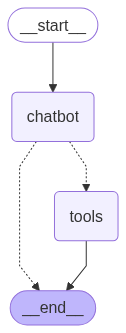

In [21]:
diagram = Image(
    graph.get_graph().draw_mermaid_png()
)
display(diagram)

In [22]:
out = graph.invoke(
    {
        "messages" : "LLM에 대해서 알려주세요"
    }
)

In [23]:
for msg in out['messages']:
    msg.pretty_print()

================================ Human Message =================================

LLM에 대해서 알려주세요
================================== Ai Message ==================================

LLM은 "대규모 언어 모델" (Large Language Model)의 약자로, 자연어 처리(NLP) 분야에서 사용되는 인공지능 모델입니다. LLM은 방대한 양의 텍스트 데이터를 학습하여 언어의 구조, 의미, 문맥 등을 이해하고 생성할 수 있는 능력을 갖추고 있습니다. 

주요 특징은 다음과 같습니다:

1. **딥 러닝 기반**: LLM은 다양한 딥 러닝 기술, 특히 트랜스포머(Transformer) 아키텍처를 사용하여 개발됩니다. 이 구조는 문맥을 이해하고 긴 문장 및 복잡한 언어적 패턴을 학습하는 데 강력한 성능을 발휘합니다.

2. **대량의 데이터 학습**: LLM은 웹사이트, 책, 논문 등에서 수집된 방대한 양의 텍스트 데이터를 학습하여 언어 패턴과 문맥을 학습합니다. 이로 인해 다양한 주제에 대한 지식을 갖추게 됩니다.

3. **다양한 작업 수행**: LLM은 글쓰기, 요약, 번역, 질문 응답, 텍스트 생성 등 다양한 언어 관련 작업을 수행할 수 있습니다. 

4. **맥락 이해**: LLM은 주어진 문맥에 따라 적절한 단어나 구문을 선택하여 텍스트를 생성할 수 있는 능력을 갖추고 있습니다.

5. **한계와 도전 과제**: 그럼에도 불구하고, LLM은 항상 정확한 정보를 제공하지 않으며, 가끔 비논리적인 응답을 하거나 편향된 데이터를 학습할 수도 있습니다. 따라서 이러한 모델을 사용할 때는 주의가 필요합니다.

현재의 LLM 개발 중 일부 예로는 OpenAI의 GPT(Generative Pre-trained Transformer) 시리즈, Google's BERT, T5, Facebook의 BART 등이 있습니다. 이러한 모델들

In [24]:
out = graph.invoke(
    {
        "messages" : "문벼리의 전화번호를 알려줘"
    }
)

In [25]:
for msg in out['messages']:
    msg.pretty_print()

================================ Human Message =================================

문벼리의 전화번호를 알려줘
================================== Ai Message ==================================
Tool Calls:
  find_phone_number (call_AbujoAjttKxPOS0vjwwC2xVw)
 Call ID: call_AbujoAjttKxPOS0vjwwC2xVw
  Args:
    name: 문벼리
================================= Tool Message =================================
Name: find_phone_number

010-1234-1234
